In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/samruddhii04/Data-Science-Assignments/refs/heads/main/MLR/ToyotaCorolla%20-%20MLR.csv")

In [6]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


<Axes: >

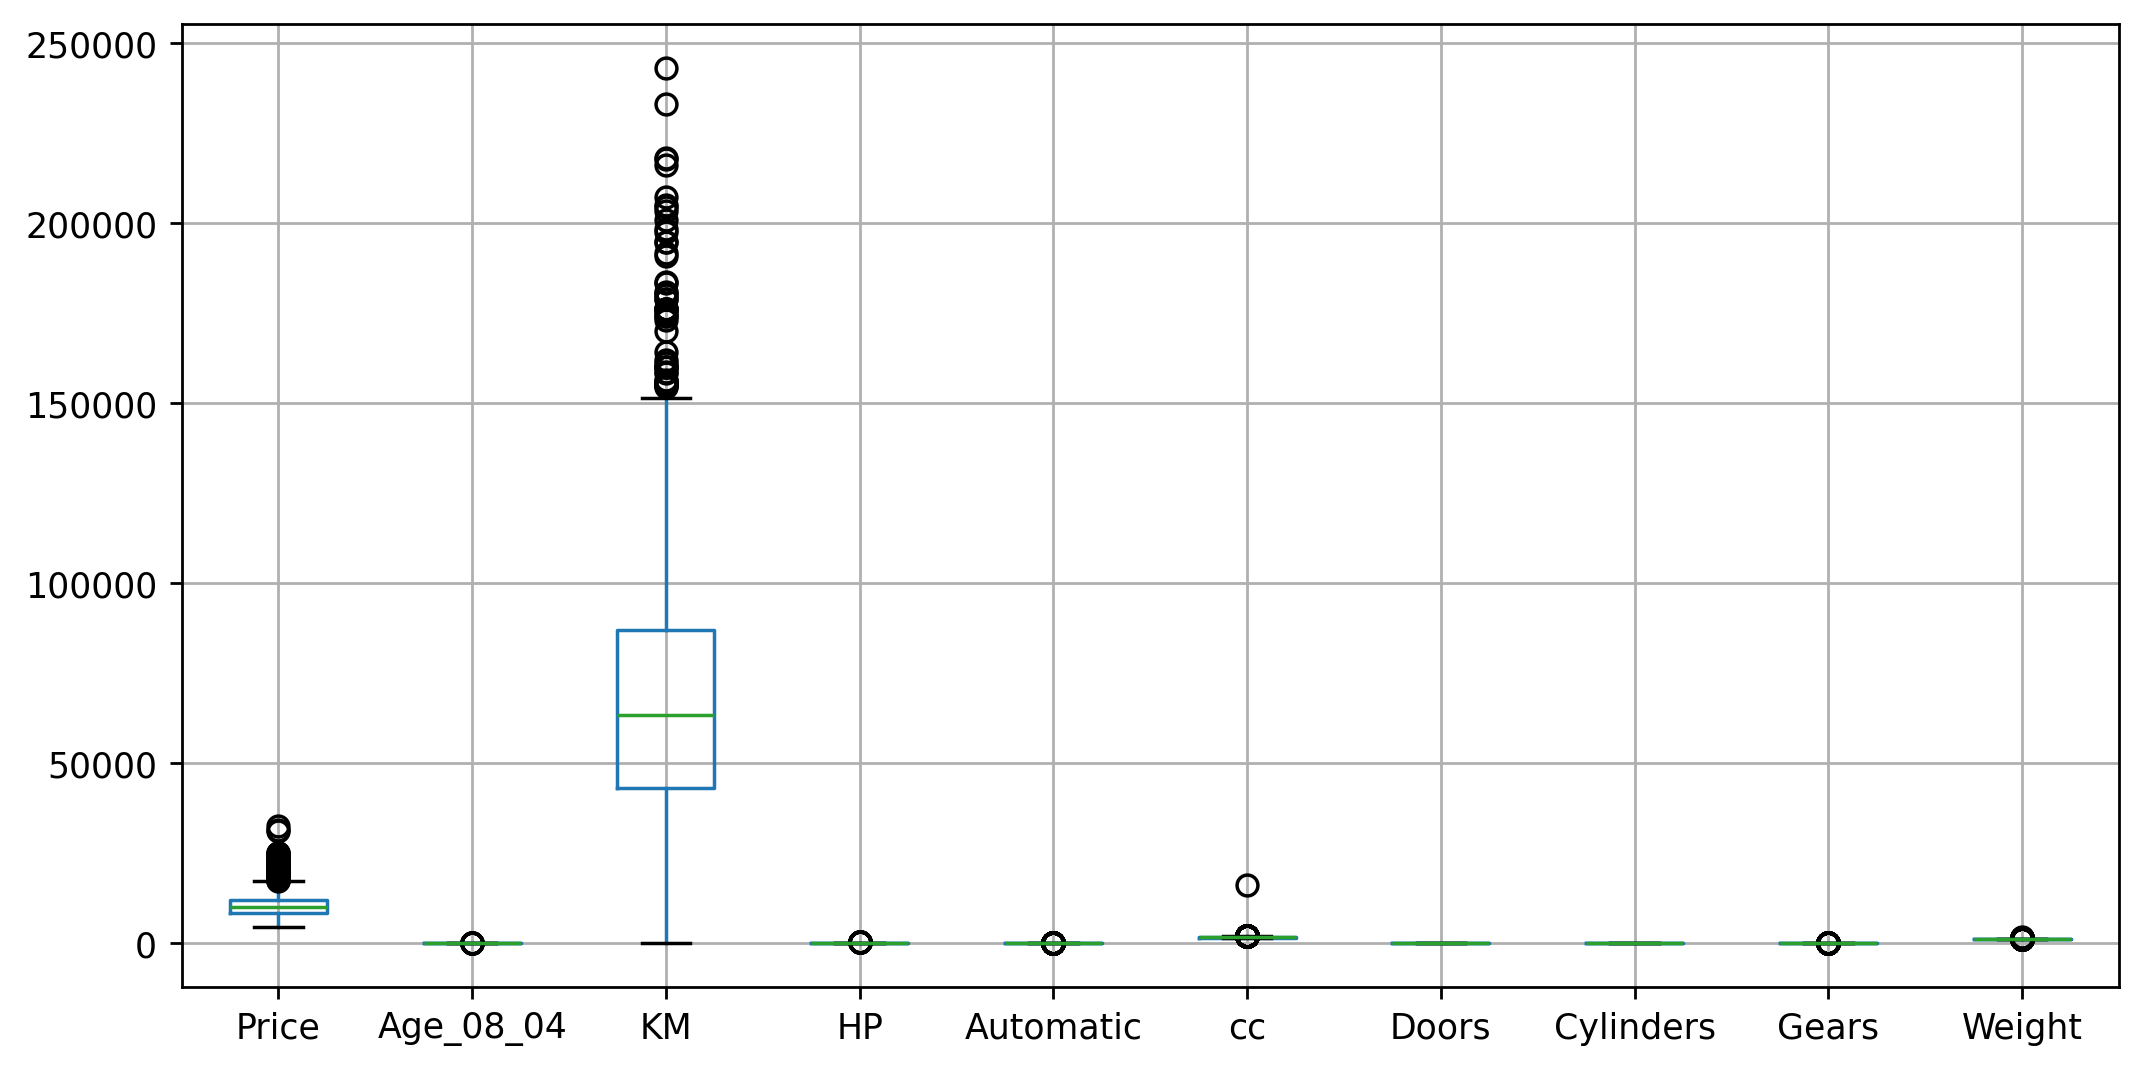

In [9]:
df.boxplot()

In [10]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [11]:
data = df.drop(columns=['Fuel_Type'])

In [12]:
df = pd.get_dummies(data=df,columns= ['Fuel_Type'], dtype = int)

In [13]:
outlier_detection(df,data.columns)

<Axes: >

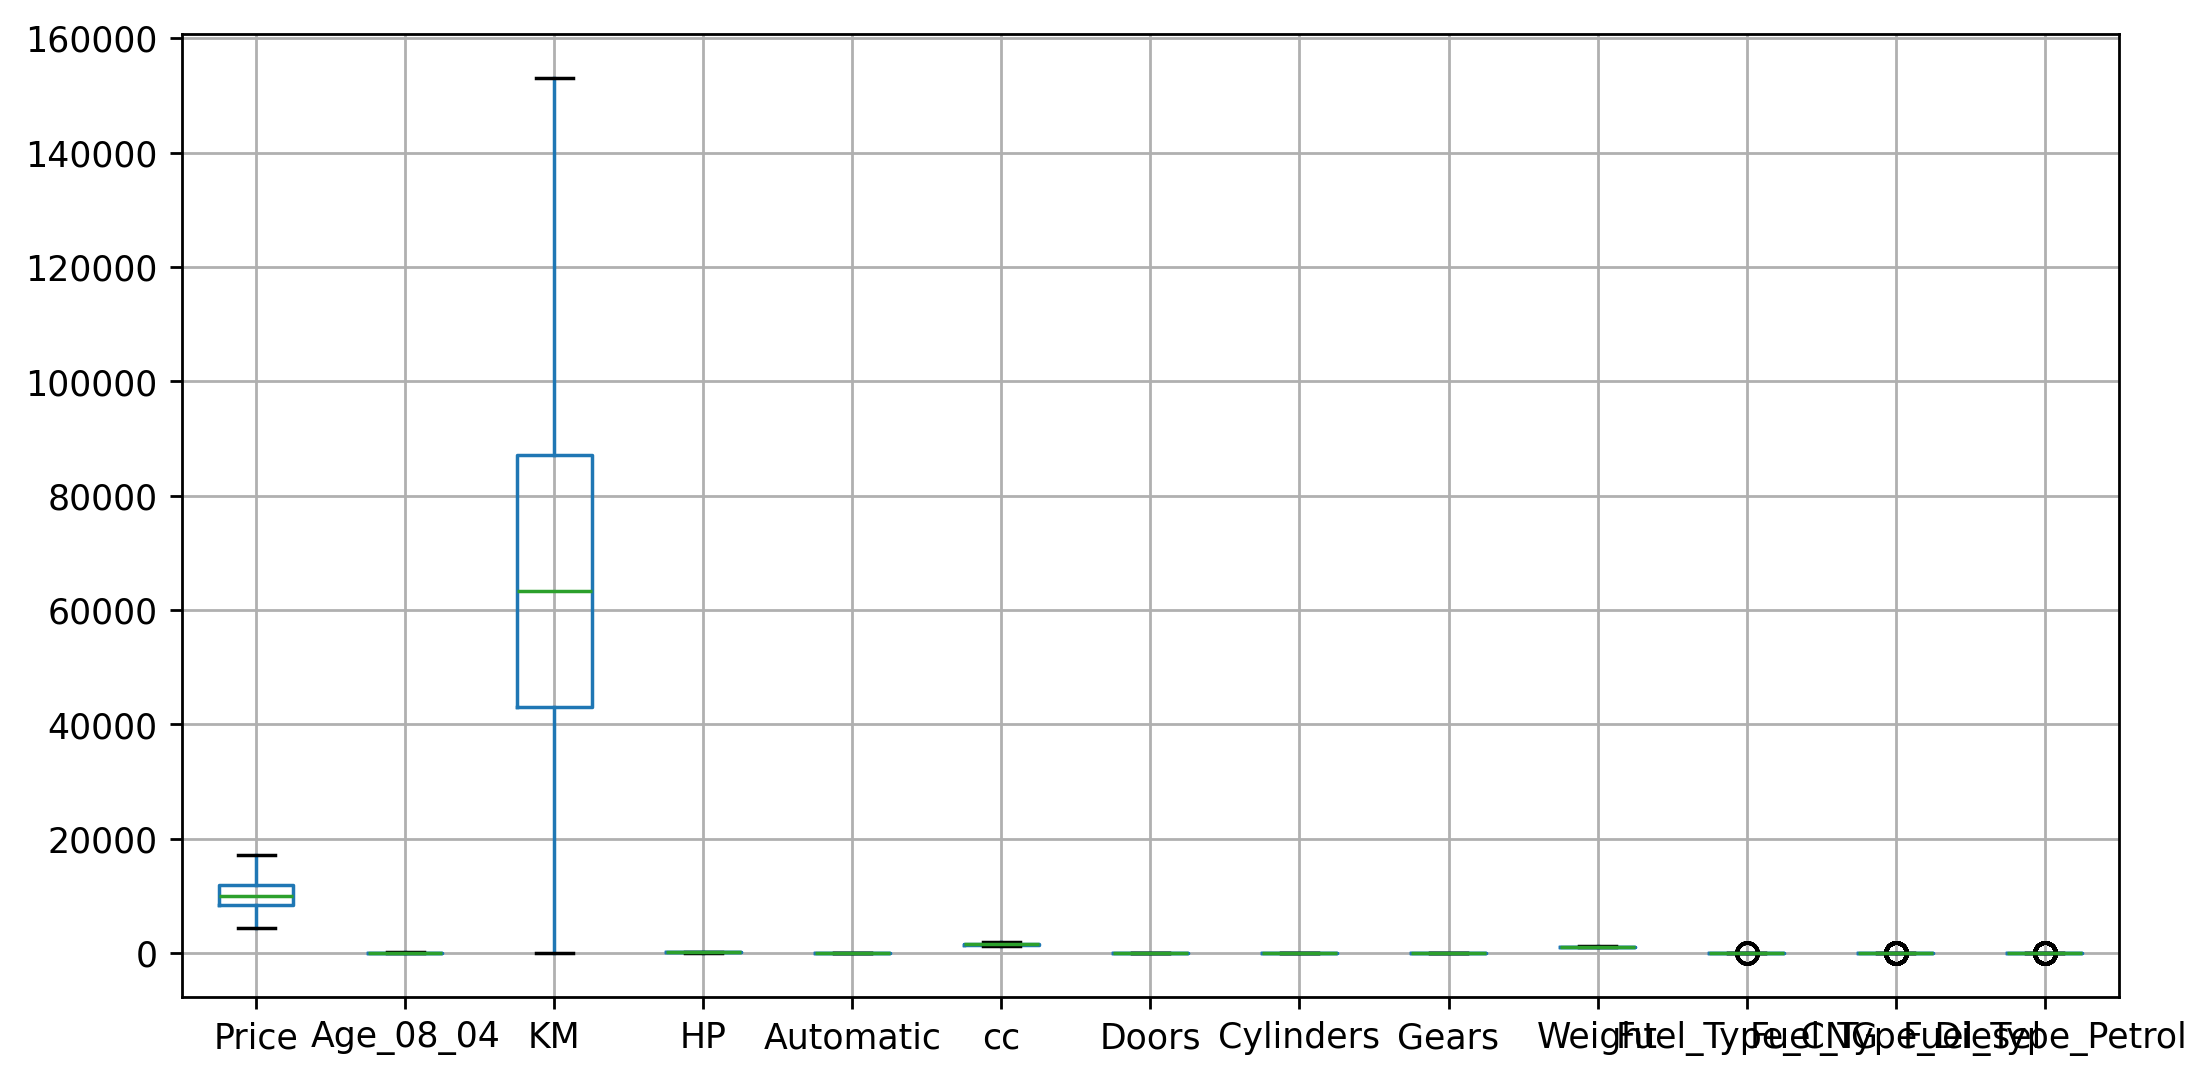

In [14]:
df.boxplot()

In [15]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0.0,1300.0,3.0,4.0,5.0,1025.0,0,0,1
1432,10845.0,72.0,19000.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1433,8500.0,71.0,17016.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1434,7250.0,70.0,16916.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1


In [16]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,86.0,0.0,1300.0,3.0,4.0,5.0,1025.0,0,0,1
1432,72.0,19000.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1433,71.0,17016.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1434,70.0,16916.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1


In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0.0,1300.0,3.0,4.0,5.0,1025.0,0,0,1
1432,10845.0,72.0,19000.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1433,8500.0,71.0,17016.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1434,7250.0,70.0,16916.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1


In [22]:
ypred = model.predict(x_test)

In [23]:
ypred

array([11093.24835891,  8993.24835891,  9277.24835891,  8915.24835891,
        9913.24835891,  8077.24835891,  8639.24835891,  8331.24835891,
       13435.24835891, 12583.24835891,  9495.24835891,  9289.24835891,
       12419.24835891, 12675.24835891,  9721.24835891,  8659.24835891,
       12041.24835891, 14493.24835891,  7683.24835891,  9079.24835891,
       12187.24835891, 16807.24835891,  8041.24835891, 10437.24835891,
        7997.24835891, 15259.24835891, 10085.24835891,  7629.24835891,
       15275.24835891, 13753.24835891,  8271.24835891,  9415.24835891,
        8521.24835891,  9973.24835891, 10097.24835891,  8199.24835891,
        8721.24835891,  9855.24835891, 15899.24835891,  9543.24835891,
        9727.24835891,  9441.24835891,  7977.24835891,  6407.24835891,
        7397.24835891, 16367.24835891,  9393.24835891, 10473.24835891,
        9043.24835891, 12865.24835891, 12473.24835891,  6971.24835891,
       14677.24835891, 15625.24835891,  6833.24835891,  7893.24835891,
      

In [24]:
r2_score(ypred,y_test)

0.8371327374631861

In [25]:
mean_squared_error(y_test,ypred)

1183391.9687812238

In [26]:
np.sqrt(mean_squared_error(y_test,ypred))

1087.838208917679

In [27]:
model.score(x_train,y_train), model.score(x_test,y_test)

(0.8667735822259492, 0.8622631007159065)

In [28]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0.0,1300.0,3.0,4.0,5.0,1025.0,0,0,1
1432,10845.0,72.0,19000.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1433,8500.0,71.0,17016.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1
1434,7250.0,70.0,16916.0,86.0,0.0,1300.0,3.0,4.0,5.0,1015.0,0,0,1


In [29]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['Price'].abs().sort_values(ascending=False)
print(corr_with_target)

Price               1.000000
Age_08_04           0.895728
KM                  0.608832
Weight              0.509536
HP                  0.255640
Doors               0.184211
cc                  0.132106
Fuel_Type_CNG       0.039638
Fuel_Type_Petrol    0.010402
Fuel_Type_Diesel    0.002931
Automatic                NaN
Cylinders                NaN
Gears                    NaN
Name: Price, dtype: float64


In [30]:
df2 = df.drop(columns=['Cylinders','Gears','Automatic','Fuel_Type_CNG','Fuel_Type_Petrol','Fuel_Type_Diesel'])
df3 = df.drop(columns=['Cylinders','Gears','Automatic','Fuel_Type_CNG','Fuel_Type_Petrol','Fuel_Type_Diesel','cc','Doors','HP'])

In [31]:
df2

,Price,Age_08_04,KM,HP,cc,Doors,Weight
0,13500.0,23.0,46986.0,90.0,1900.0,3.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3.0,1152.5
...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,1300.0,3.0,1025.0
1432,10845.0,72.0,19000.0,86.0,1300.0,3.0,1015.0
1433,8500.0,71.0,17016.0,86.0,1300.0,3.0,1015.0
1434,7250.0,70.0,16916.0,86.0,1300.0,3.0,1015.0


In [32]:
x2 = df2.drop(columns=['Price'])
y2 = df2['Price']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [34]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [35]:
ypred2 = model2.predict(x_test)

In [36]:
ypred2

array([11171.84665295,  8929.70207541,  9187.46386907,  8871.5472338 ,
        9894.03834021,  7988.52451205,  8605.89332271,  8330.35884405,
       13393.42390442, 12577.4793247 ,  9389.8843263 ,  9270.61338212,
       12397.07902891, 12736.02109657,  9644.09736829,  8700.42445145,
       12072.08391489, 14384.76734031,  7529.67870108,  9061.24099623,
       12177.57790226, 16799.07949387,  8004.19201235, 10487.53504965,
        7962.55096335, 15229.45611878, 10044.09843745,  7486.23308674,
       15243.96556985, 13760.63941285,  8206.34796728,  9446.31006031,
        8488.21640022,  9925.37000954, 10068.46233767,  8134.48143193,
        8689.91606667,  9807.86478879, 15860.31506043,  9412.61279941,
        9710.83500889,  9416.49784319,  7929.92468642,  6279.13164822,
        7420.40836204, 16276.4336819 ,  9344.13541556, 10414.96180323,
        9107.99298551, 12886.25908923, 12485.15511339,  7014.86180769,
       14591.5023885 , 15589.78342701,  6750.47896715,  7815.73478419,
      

In [37]:
r2_score(ypred2,y_test)

0.8387628631362551

In [38]:
mean_squared_error(y_test,ypred2)

1175429.6447068597

In [39]:
np.sqrt(mean_squared_error(y_test,ypred))

1087.838208917679

In [40]:
model2.score(x_train,y_train), model2.score(x_test,y_test)

(0.8645007525058395, 0.8631898484529454)

In [41]:
df3

,Price,Age_08_04,KM,Weight
0,13500.0,23.0,46986.0,1152.5
1,13750.0,23.0,72937.0,1152.5
2,13950.0,24.0,41711.0,1152.5
3,14950.0,26.0,48000.0,1152.5
4,13750.0,30.0,38500.0,1152.5
...,...,...,...,...
1431,7500.0,69.0,20544.0,1025.0
1432,10845.0,72.0,19000.0,1015.0
1433,8500.0,71.0,17016.0,1015.0
1434,7250.0,70.0,16916.0,1015.0


In [42]:
x3 = df3.drop(columns=['Price'])
y3 = df3['Price']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [44]:
model3 = LinearRegression()
model3.fit(x_train,y_train)

LinearRegression()

In [45]:
ypred3 = model3.predict(x_test)

In [46]:
ypred3

array([11466.85762948,  8731.21319782,  9827.00243466,  8729.7842655 ,
        9816.8986723 ,  7597.27236278,  8625.76875813,  8297.57348974,
       13406.91208749, 12615.02346015,  8978.30638606,  9197.46661682,
       12417.98814066, 13045.51136437,  9446.64723649,  8894.69512215,
       12280.43714017, 14707.45541825,  7090.38557598,  8989.22231744,
       12350.56883226, 16805.67581571,  7839.16774355, 10680.4446255 ,
        7913.94452234, 15071.96154382,  9864.66406464,  7068.34089426,
       14960.97317822, 13909.14091636,  8015.84434691,  9751.5919218 ,
        8355.0129706 ,  9843.65264372, 10039.35541423,  7905.23692918,
        8753.00183102,  9720.31902256, 15579.68761589,  9046.34499995,
        9699.73797537,  9371.93148231,  7740.95331246,  5956.91576885,
        7517.80318849, 15906.30814278,  9235.58923331, 10267.72751783,
        9377.36451238, 12999.95711701, 12622.15520994,  7150.02265385,
       14143.36926294, 15287.89260143,  6564.18783622,  7547.40497302,
      

In [47]:
r2_score(ypred3,y_test)

0.8201091777393188

In [48]:
mean_squared_error(y_test,ypred3)

1291813.8139320626

In [49]:
np.sqrt(mean_squared_error(y_test,ypred3))

1136.5798757377602

In [50]:
model3.score(x_train,y_train), model3.score(x_test,y_test)

(0.8509660441059883, 0.849643707345241)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
l1 = Lasso()
l1.fit(x_train,y_train)
l1.score(x_train,y_train), l1.score(x_test,y_test)

(0.8669321848871813, 0.862684087889016)

In [53]:
l2 = Ridge()

l2.fit(x_train,y_train)
l2.score(x_train,y_train), l2.score(x_test,y_test)

(0.866933781674933, 0.8626632937626036)

In [54]:
en = ElasticNet()
en.fit(x_train,y_train)
en.score(x_train,y_train), en.score(x_test,y_test)

(0.8118548296592043, 0.8069026727145054)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [56]:
l1 = Lasso()
l1.fit(x_train,y_train)
l1.score(x_train,y_train), l1.score(x_test,y_test)

(0.8645005879409666, 0.863177802901073)

In [57]:
l2 = Ridge()

l2.fit(x_train,y_train)
l2.score(x_train,y_train), l2.score(x_test,y_test)

(0.8645007516914991, 0.8631889462760978)

In [58]:
en = ElasticNet()
en.fit(x_train,y_train)
en.score(x_train,y_train), en.score(x_test,y_test)

(0.8644034922191617, 0.8627698761324212)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [60]:
l1 = Lasso()
l1.fit(x_train,y_train)
l1.score(x_train,y_train), l1.score(x_test,y_test)

(0.8509660436477711, 0.8496432426512722)

In [61]:
l2 = Ridge()

l2.fit(x_train,y_train)
l2.score(x_train,y_train), l2.score(x_test,y_test)

(0.8509660441006147, 0.8496436446822294)

In [62]:
en = ElasticNet()
en.fit(x_train,y_train)
en.score(x_train,y_train), en.score(x_test,y_test)

(0.8509642579411623, 0.8496058736002401)

In [63]:
# Interview Question

In [ ]:
#1.What is Normalization & Standardization and how is it helpful?

#Ans: Normalization and standardization are techniques used to scale data, making it easier to analyze and interpret, particularly in the context of machine learning and statistical analysis.

#2.What techniques can be used to address multicollinearity in multiple linear regression?

#Ans: To address multicollinearity, techniques such as regularization or feature selection can be applied to select a subset of independent variables that are not highly correlated with each other. In this article, we will focus on the most common one – VIF (Variance Inflation Factors).